# Exploratory Analysis

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import logging
import seaborn as sns

import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from utils import *

logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

%matplotlib inline

### Prepare the data

Load and combine different generated datasets into one graph.

In [2]:
data_path = './data_small_graph/'

combined_directed_G = load_networkx_graphs(data_path)

1000_Network_p_0.002_w_0.003.json  - max_node_id= -1
1000_Network_p_0.002_w_0.008.json  - max_node_id= 999
1000_Network_p_0.002_w_0.009.json  - max_node_id= 1999
1000_Network_p_0.004_w_0.004.json  - max_node_id= 2999
1000_Network_p_0.004_w_0.007.json  - max_node_id= 3999
1000_Network_p_0.004_w_0.009.json  - max_node_id= 4999
1000_Network_p_0.005_w_0.009.json  - max_node_id= 5999
1000_Network_p_0.006_w_0.007.json  - max_node_id= 6999
1000_Network_p_0.007_w_0.002.json  - max_node_id= 7999
1000_Network_p_0.007_w_0.009.json  - max_node_id= 8999
1000_Network_p_0.007_w_0.010.json  - max_node_id= 9999
1000_Network_p_0.008_w_0.000.json  - max_node_id= 10999
1000_Network_p_0.008_w_0.005.json  - max_node_id= 11999
1000_Network_p_0.008_w_0.007.json  - max_node_id= 12999
1000_Network_p_0.010_w_0.001.json  - max_node_id= 13999
1000_Network_p_0.010_w_0.006.json  - max_node_id= 14999
1000_Network_p_0.011_w_0.003.json  - max_node_id= 15999
1000_Network_p_0.011_w_0.005.json  - max_node_id= 16999
1000_N

### Graph dataset statistics

In [3]:
X, Y, _ = retrieve_node_features_and_labels_tuple(combined_directed_G)

In [4]:
X.shape, Y.shape

((44000, 129), (44000,))

In [5]:
combined_directed_G.number_of_nodes()

44000

In [6]:
combined_directed_G.number_of_edges()

1384756

In [8]:
neg, pos = np.bincount(Y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 44000
    Positive: 6214 (14.12% of total)



In [15]:
print(nx.info(combined_directed_G))

Name: 
Type: DiGraph
Number of nodes: 44000
Number of edges: 1384756
Average in degree:  31.4717
Average out degree:  31.4717


### Graph calculated feature statistics

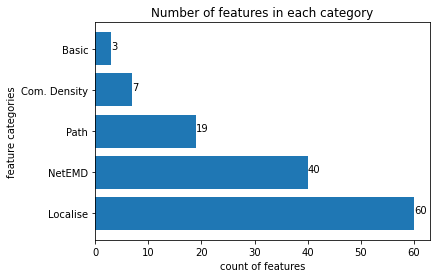

In [9]:
feature_len = [len(feature) for feature in categories_features.values()]
feature_type = list(categories_features.keys())

plt.barh(list(categories_features.keys()), feature_len)
plt.title("Number of features in each category")
plt.xlabel("count of features")
plt.ylabel("feature categories")

for index, value in enumerate(feature_len):
    plt.text(value, index, str(value))

In [6]:
X.head()

,NetEMD_comb_1,NetEMD_comb_2,NetEMD_lower_1,NetEMD_lower_2,NetEMD_rw_1,NetEMD_rw_2,NetEMD_upper_1,NetEMD_upper_2,comb_abs90,comb_absolute_value,...,upper_exp_4,upper_ipr90,upper_ipr_1,upper_ipr_2,upper_ipr_3,upper_ipr_4,upper_sign_equal_1,upper_sign_equal_2,upper_sign_stat_1,upper_sign_stat_2
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.183602,...,3.439360,7.763259,4.23539,0.0,0.000000,4.326967,0.0,0.0,0.000000,0.000000
1,0.0,2.128045,0.0,0.0,0.0,0.0,0.0,0.0,75.812344,2.765107,...,0.000000,21.001802,32.25912,0.0,0.000000,0.000000,0.0,0.0,30.913145,0.564841
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,75.812344,0.926500,...,0.000000,21.001802,32.25912,0.0,0.000000,0.000000,0.0,0.0,25.048753,0.471176
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.711147,...,2.232923,0.000000,0.00000,0.0,2.830403,1.953260,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,16.482683,1.215719,...,1.798233,0.000000,26.32582,8.0,0.000000,2.876427,0.0,0.0,9.197338,0.240842


In [10]:
X.describe()

,NetEMD_comb_1,NetEMD_comb_2,NetEMD_lower_1,NetEMD_lower_2,NetEMD_rw_1,NetEMD_rw_2,NetEMD_upper_1,NetEMD_upper_2,comb_abs90,comb_absolute_value,...,upper_exp_4,upper_ipr90,upper_ipr_1,upper_ipr_2,upper_ipr_3,upper_ipr_4,upper_sign_equal_1,upper_sign_equal_2,upper_sign_stat_1,upper_sign_stat_2
count,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,...,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000,44000.000000
mean,0.016278,0.015199,0.062512,0.041417,0.033943,0.024896,0.002875,0.003732,7.808926,1.603495,...,4.445531,5.401356,6.691202,5.306686,3.445347,4.721047,0.143144,0.001072,3.660802,0.058983
std,0.333873,0.188846,0.480102,0.294982,0.443692,0.243783,0.101183,0.086596,18.331687,0.724166,...,9.632160,9.283384,13.328974,9.565583,7.001369,10.411930,0.801960,0.005865,9.290469,0.147598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.031423,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.443622,...,0.000000,0.000000,1.726138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.783172,2.078747,...,4.273242,6.680902,7.283007,8.000000,5.520608,4.299384,0.000000,0.000000,0.000000,0.000000
max,24.390016,4.256090,11.001634,4.256090,14.109276,4.256090,5.978958,2.128045,107.340526,3.949486,...,71.627446,44.779791,104.960388,85.872281,57.734933,90.863058,8.072180,0.056846,88.671025,1.196498


### Highlighted features of positive and negative labels

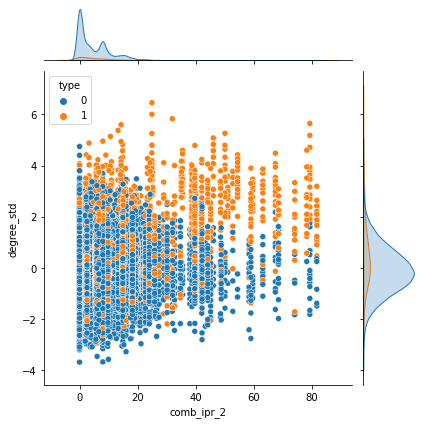

In [11]:
full_df = X.copy()
full_df['type'] = Y

sns.jointplot(data=full_df, x="comb_ipr_2", y="degree_std", hue="type")

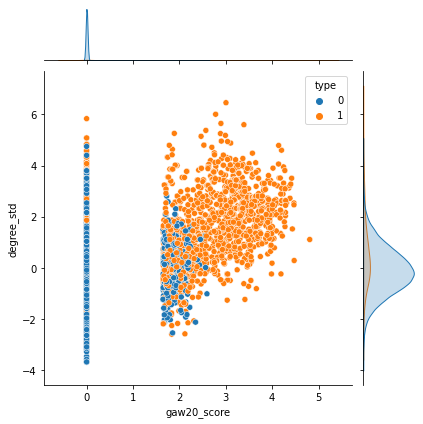

In [12]:
sns.jointplot(data=full_df, x="gaw20_score", y="degree_std", hue="type")